# CNN 

## 0. 시작 전 
  
  학교에서 치아 데이터를 학습시켜 이상치를 구분하는 알고리즘을 구현하고 있었다. 그 과정에서 모델에 중요성보다 중요한 것이 이미지 전처리 과정이였는데. 이미지를 어떻게 차원축소하고 어떻게 리사이즈 하는지도 중요했지만 cnn을 이용해 이미지의 특정 부분을 추출 할 수 있다고 해서 이렇게 공부한 내용을 필기한다.
  
## 1. CNN이란?

CNN : convolutional Neural Network의 약자로 이미지나 영상과 같은 데이터를 처리할 때 발생하는 문제점을 보완한 방법.  

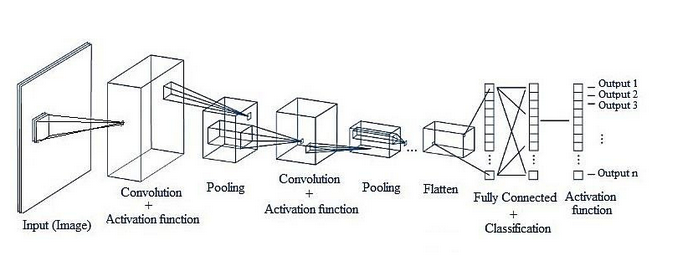
  
문제점) 448x448 형태의 이미지는 448x448x3 의 데이터를 갖고 있고 이것을 하나의 row로 표현할 때 큰 손실을 갖게 된다.  
  
이미지는 다음과 같은 구조로 인식 한다.  
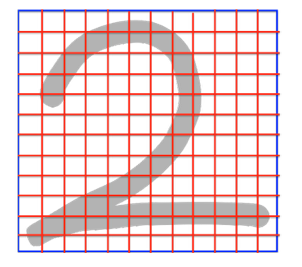  

cnn에서는 이 이미지의 한 픽셀과 주변 픽셀들의 연관관계를 유지시키며 학습 시킨다. 

1. (Convolution) 하나의 이미지로부터 픽셀간의 연관성을 살려 여러개의 이미지를 생성해낸다. 
    - 방법은 3x3의 크기로 이미지를 뽑아내서 마찬가지로 3x3 크기의 랜덤값을 갖고 있는 필터와 픽셀을 내적한다. 
    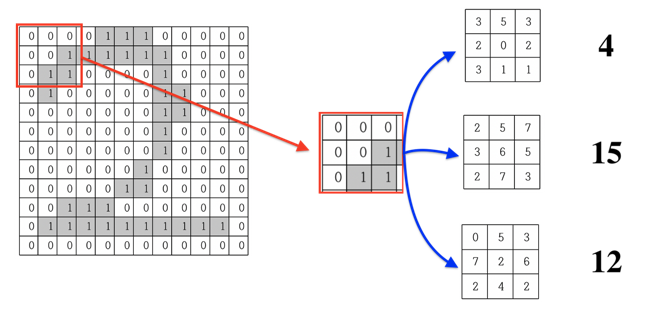
    - 이 그림에서 볼 때 4, 5, 12와 같이 다른 값이 발생하는데 이 값 중 하나를 이용하고 12x12의 이미지는 10x10 크기의 이미지를 생성한다.
    - 여기서 **strides**를 조정해주면 빨간부분이 한 칸이 아닌 두, 세칸으로 조정가능.
    - **padding** : 12x12 -> 10x10 으로 줄어들 때도 이미지 손실이 발생하는데 이것을 해결하기 위해 0 값을 갖는 데이터를 이미지 가장자리에 추가하여 원래의 크기와 동일한 이미지를 유지해주는 방법 (10x10 -> 12x12)
    - 왜 활성함수를 쓸까? -> 선형함수인 convolution에 비선형성를 추가하기 위해 사용. 보통 activation ='relu' 를 사용


2. (Pooling) Convolution 과정에서 많은 수의 이미지 결과값을 축소해준다.
    - 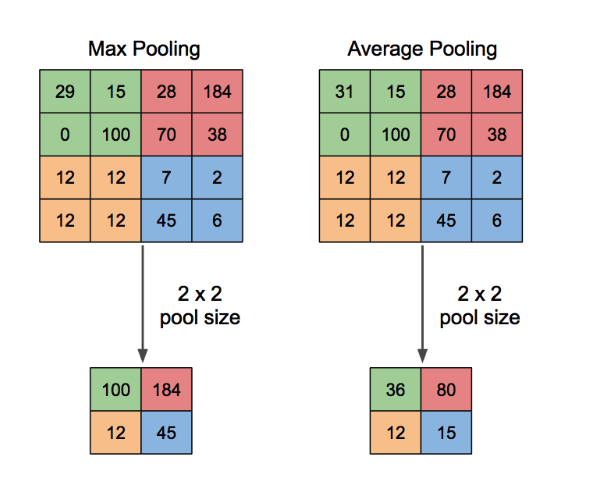
    - 위와 같이 pooling에는 대표적으로 Max pooling과 Average pooling이 있다.
    - pool의 크기가 2x2인 경우 2x2크기의 matrix에서 가장 큰 값이나 평균값을 가져와 결과값의 크기를 반으로 줄인다.

3. (Flatten) 데이터를 일렬로 쭉 세우는 느낌으로 벡터 형태로 변형된다.
    - 이렇게 일렬로 세워도 되는걸까? -> 이미 위에 convolution과 pooling 과정으로 이미지 자체를 받아왔다기 보단 이미지에서 얻은 특이점 데이터이기 때문에 1차원 벡터데이터로 변형 시켜도 무관하다.

4. (Dense) Fully-connected Layers로 적용시켜 마지막에 softmax activation function을 적용해 최종결과물 출력  

## 2. Convolution Layer 와 Pooling Layer 의 출력 크기 
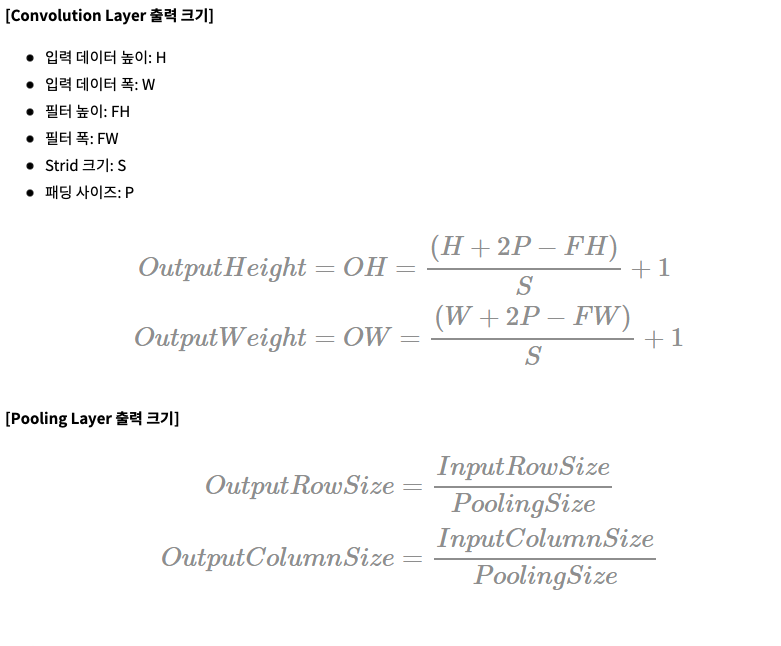

## 3. parameter 계산 

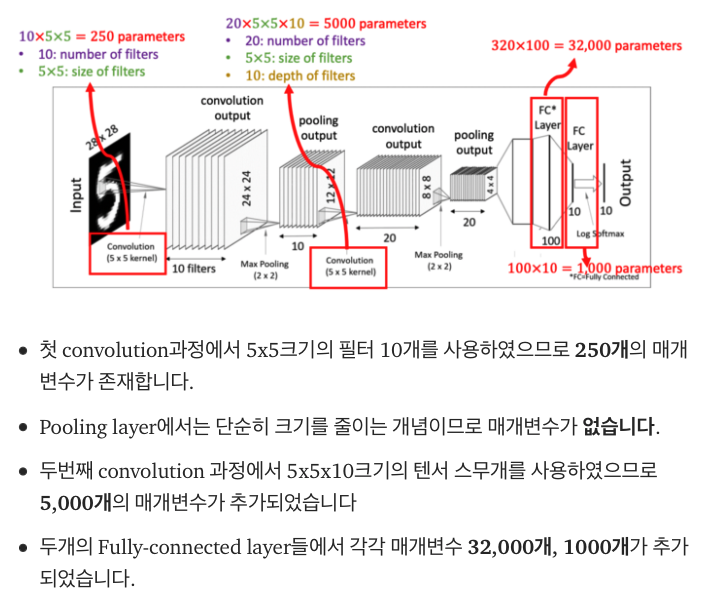

## 4. example


In [1]:
import tensorflow as tf
from tensorflow import keras

model = keras.Sequential([
    keras.layers.Conv2D(4, kernel_size=(9,9), padding='same', activation='relu', 
                        input_shape=(256,256,3)), # 256-9+1=248 크기, 9x9 필터 4장, 패딩 on
    keras.layers.MaxPooling2D(pool_size=(2,2)), # 248/2 = 128 크기로 풀링. 
    keras.layers.Conv2D(8, kernel_size=(5,5), padding='same', activation='relu'),
    keras.layers.MaxPooling2D(pool_size=(2,2)),
    keras.layers.Conv2D(16, kernel_size=(5,5), padding='same', activation='relu'),
    keras.layers.MaxPooling2D(pool_size=(2,2)),
    keras.layers.Conv2D(32, kernel_size=(3,3), padding='same', activation='relu'),
    keras.layers.MaxPooling2D(pool_size=(2,2)),
    keras.layers.Flatten(), # 16x16x32 = 8192 
    keras.layers.Dense(2048, activation='relu'), # 8192x2048
    keras.layers.Dense(1024, activation='relu')  # 1024x2048
])

2021-10-19 02:00:45.907063: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:305] Could not identify NUMA node of platform GPU ID 0, defaulting to 0. Your kernel may not have been built with NUMA support.
2021-10-19 02:00:45.907454: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:271] Created TensorFlow device (/job:localhost/replica:0/task:0/device:GPU:0 with 0 MB memory) -> physical PluggableDevice (device: 0, name: METAL, pci bus id: <undefined>)


Metal device set to: Apple M1


In [2]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 256, 256, 4)       976       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 128, 128, 4)       0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 128, 128, 8)       808       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 64, 64, 8)         0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 64, 64, 16)        3216      
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 32, 32, 16)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 32, 32, 32)        4